To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth your local device, follow [our guide](https://docs.unsloth.ai/get-started/install-and-update). This notebook is licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News


Introducing FP8 precision training for faster RL inference. [Read Blog](https://docs.unsloth.ai/new/fp8-reinforcement-learning).

Unsloth's [Docker image](https://hub.docker.com/r/unsloth/unsloth) is here! Start training with no setup & environment issues. [Read our Guide](https://docs.unsloth.ai/new/how-to-train-llms-with-unsloth-and-docker).

[gpt-oss RL](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning) is now supported with the fastest inference & lowest VRAM. Try our [new notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/gpt-oss-(20B)-GRPO.ipynb) which creates kernels!

Introducing [Vision](https://docs.unsloth.ai/new/vision-reinforcement-learning-vlm-rl) and [Standby](https://docs.unsloth.ai/basics/memory-efficient-rl) for RL! Train Qwen, Gemma etc. VLMs with GSPO - even faster with less VRAM.

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Installation

In [1]:
%%capture
import os, re
if "COLAB_" not in "".join(os.environ.keys()):
    !pip install unsloth
else:
    # Do this only in Colab notebooks! Otherwise use pip install unsloth
    import torch; v = re.match(r"[0-9]{1,}\.[0-9]{1,}", str(torch.__version__)).group(0)
    xformers = "xformers==" + ("0.0.33.post1" if v=="2.9" else "0.0.32.post2" if v=="2.8" else "0.0.29.post3")
    !pip install --no-deps bitsandbytes accelerate {xformers} peft trl triton cut_cross_entropy unsloth_zoo
    !pip install sentencepiece protobuf "datasets==4.3.0" "huggingface_hub>=0.34.0" hf_transfer
    !pip install --no-deps unsloth
!pip install transformers==4.56.2
!pip install --no-deps trl==0.22.2
!pip install jiwer
!pip install einops addict easydict

In [2]:
!sudo apt-get install poppler-utils
!pip install pdf2image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.12).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


### Unsloth

Let's prepare the OCR model to our local first

In [3]:
from huggingface_hub import snapshot_download
snapshot_download("unsloth/DeepSeek-OCR", local_dir = "deepseek_ocr")

Fetching 21 files:   0%|          | 0/21 [00:00<?, ?it/s]

'/content/deepseek_ocr'

In [4]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
from transformers import AutoModel
import os
os.environ["UNSLOTH_WARN_UNINITIALIZED"] = '0'
# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Qwen3-VL-8B-Instruct-bnb-4bit", # Qwen 3 vision support
    "unsloth/Qwen3-VL-8B-Thinking-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Instruct-bnb-4bit",
    "unsloth/Qwen3-VL-32B-Thinking-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    "./deepseek_ocr",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    auto_model = AutoModel,
    trust_remote_code=True,
    unsloth_force_compile=True,
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


Unsloth: WARNING `trust_remote_code` is True.
Are you certain you want to do remote code execution?
==((====))==  Unsloth 2026.1.2: Fast Deepseekocr patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.5.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.33.post1. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.
Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at ./deepseek_ocr and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Let's Fine-tune Deepseek-OCR with this new arabic dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Unzip the data into the Colab machine (faster than reading from Drive)
!unzip -q "/content/drive/My Drive/ocr-data.zip" -d "/content/dataset"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
replace /content/dataset/ar_pub/images/segment_21568_page_00007.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


This will replace the loader block based on how our dataset is structured.

In [6]:
import os
from datasets import Dataset, Image

base_path = "/content/dataset/ar_pub"
images_dir = os.path.join(base_path, "images")
texts_dir  = os.path.join(base_path, "texts")

# theses lists will hold our data
data_dict = {
    "image": [],
    "text": []  # This is the "Ground Truth" the model will learn from
}


# Next we loop through our images and find matching text files then we sort them

In [7]:
image_files = sorted([f for f in os.listdir(images_dir) if f.endswith(".png")])

print(f"Found {len(image_files)} images. Loading...")

for img_file in image_files:
    # Construct the full path to the image
    img_path = os.path.join(images_dir, img_file)

    # Find the matching text file (same name but .txt)
    txt_filename = img_file.replace(".png", ".txt")
    txt_path = os.path.join(texts_dir, txt_filename)

    # Only add if both exist
    if os.path.exists(txt_path):
        with open(txt_path, "r", encoding="utf-8") as f:
            ground_truth_text = f.read().strip()

        data_dict["image"].append(img_path)
        data_dict["text"].append(ground_truth_text)

Found 24948 images. Loading...


# Now we can convert to Hugging Face Dataset format

In [8]:
dataset = Dataset.from_dict(data_dict)
dataset = dataset.cast_column("image", Image())

print("Success! dataset loaded.")
print(dataset[0])

Success! dataset loaded.
{'image': <PIL.PngImagePlugin.PngImageFile image mode=1 size=4961x7016 at 0x7949C5CB7F20>, 'text': 'النص ١ تلخيص المقال: أتلانتا، جورجيا ــ في صنع إلى البرية، إميل هيرش عبرت الأنهار في ألاسكا، وتعامل مع حرارة الصحراء الحارقة وركبت الشلالات الهائجة في الجنوب الغربي الأمريكي. قام بالتمثيل في و و الآن لكن اسأله عن موقع خطير تعامل معه أثناء إنتاج فيلم ويجيب داكوتا الجنوبية داكوتا الجنوبية؟ يبدو أن كان لديه بعض المكالمات القريبة أثناء تصوير المشاهد في مزرعة في ولاية الأخرى في إحدى المرات، بينما كان في مصعد الحبوب مُعدّ للتعامل مع حمولات تزن ٣٠٠ رطل، أخرج هيرش الدبوس الذي يحمل المصعد في مكانه لقد صعدت المنصة بسرعة كبيرة لدرجة أنها أطلقتني في الهواء وأطلقت قطع خشبية علي عندما وصلت إلى القمة، كما يتذكر. إلى البرية، استناداً إلى كتاب جون كراكواير الأكثر مبيعاً، هي قصة كريس ماكاندليس، الذي كان قلقه الطيب يدفعه للبحث عن مغامرة روحية. شاهد يتحدث عن الحياة على الطريق أثناء سفره عبر السهول الغربية والعليا في طريقه إلى ألاسكا، التقى ماكاندلس بعمال المزارع، والهبيين المتنقلين،

In [9]:
# Save an image (we'll use index 0, the first one) to test the model
# We change ['image_path'] to ['image'] because that's what your data uses.
dataset[0]['image'].save("my_test_image.jpg")
print("Saved 'my_test_image.jpg' for testing")

Saved 'my_test_image.jpg' for testing


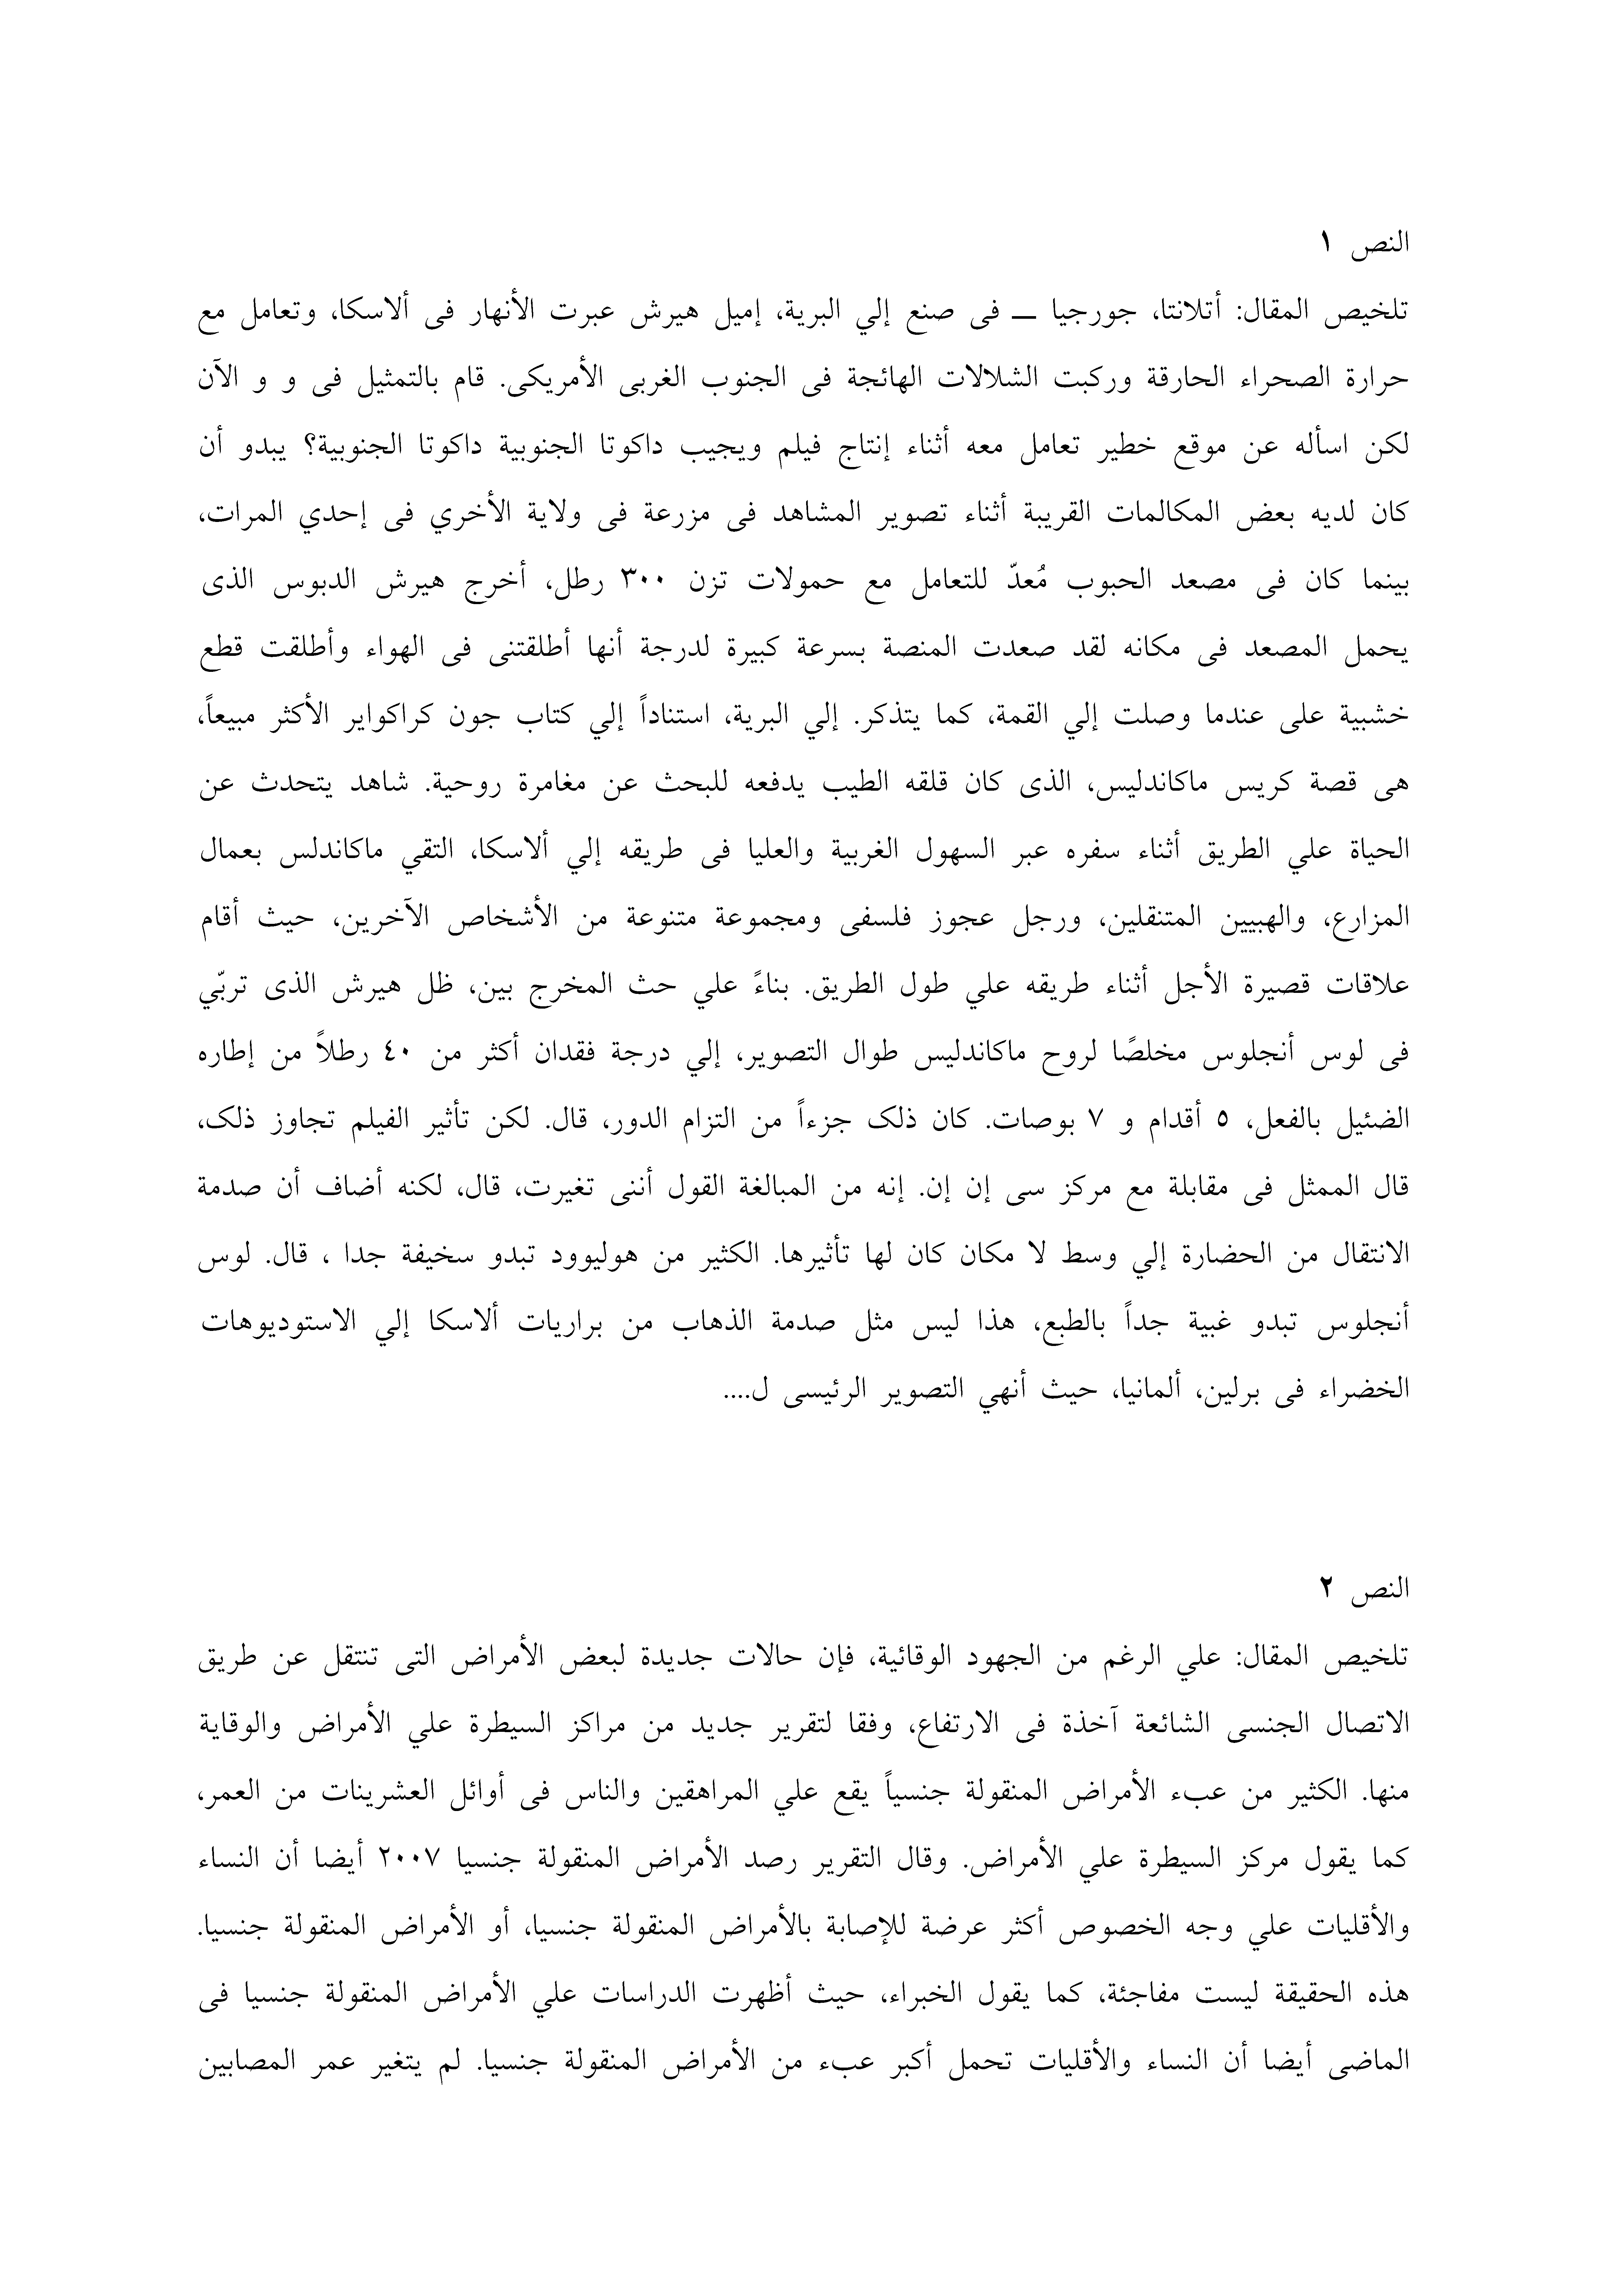

In [10]:
dataset[0]['image']

# Let's see how the model performs before we teach it Arabic

In [11]:
# Test the model before training
# We use the image we saved in the previous cell
prompt = "<image>\nFree OCR. "

# Run inference
res = model.infer(
    tokenizer,
    prompt=prompt,
    image_file="my_test_image.jpg",
    output_path="./output_before_train",
    base_size=1024,
    image_size=640,
    crop_mode=True,
    save_results=True,
    test_compress=False
)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


BASE:  torch.Size([1, 256, 1280])
PATCHES:  torch.Size([6, 100, 1280])
النص 1

تلخيص المقال: أتلاننا، جورجيا – في صنع إي البرية، إميل هيرش عبرت الأنهار في الأسكا، وتعامل مع حرارة الصحراء الحارقة وركبت الشلالات الهائجة في الجنوب الغربي الأمريكي. قام بالتمثيل في و و الآن لكن أسأله عن موقع خطير تعامل معه أثناء إنتاج فيلم ويجيب داكوتا الجنوبية داكوتا الجنوبية؟ يبدو أن كان لديه بعض المكالمات القريبة أثناء تصوير المشاهد في مزرعة في ولاية الأخري في إحدى المرات، بينما كان في مصعد الحبوب مُعدّ للتعامل مع محولات تزن ٣٠٠ رطل، أخرج هيرش الدبوس الذي يحمل المصعد في مكانه لقد صعدت المنصة بسرعة كبيرة لدرجة أنها أطلقتني في الهواء وأطلقت قطع خشبية على عندما وصلت إي القمة، كما يتذكر. إي البرية، استناداً إي كتاب جون كراوكاير الأكثر مبيعاً، هي قصة كريس ماكاندليس، الذي كان قلقه الطيب يدفعه للبحث عن مغامرة روحية. شاهد يتحدث عن الحياة على الطريق أثناء سفره عبر السهول الغربية والعليا في طريقه إي الأسكا، التقى ماكاندلس بعمال المزارع، والهيئين المتنقلين، ورجل عجوز فلسفي ومجموعة متنوعة من الأشخاص الآخرين، حيث أقا

image: 0it [00:00, ?it/s]
other: 0it [00:00, ?it/s]


In [12]:
dataset[0]["text"]

'النص ١ تلخيص المقال: أتلانتا، جورجيا ــ في صنع إلى البرية، إميل هيرش عبرت الأنهار في ألاسكا، وتعامل مع حرارة الصحراء الحارقة وركبت الشلالات الهائجة في الجنوب الغربي الأمريكي. قام بالتمثيل في و و الآن لكن اسأله عن موقع خطير تعامل معه أثناء إنتاج فيلم ويجيب داكوتا الجنوبية داكوتا الجنوبية؟ يبدو أن كان لديه بعض المكالمات القريبة أثناء تصوير المشاهد في مزرعة في ولاية الأخرى في إحدى المرات، بينما كان في مصعد الحبوب مُعدّ للتعامل مع حمولات تزن ٣٠٠ رطل، أخرج هيرش الدبوس الذي يحمل المصعد في مكانه لقد صعدت المنصة بسرعة كبيرة لدرجة أنها أطلقتني في الهواء وأطلقت قطع خشبية علي عندما وصلت إلى القمة، كما يتذكر. إلى البرية، استناداً إلى كتاب جون كراكواير الأكثر مبيعاً، هي قصة كريس ماكاندليس، الذي كان قلقه الطيب يدفعه للبحث عن مغامرة روحية. شاهد يتحدث عن الحياة على الطريق أثناء سفره عبر السهول الغربية والعليا في طريقه إلى ألاسكا، التقى ماكاندلس بعمال المزارع، والهبيين المتنقلين، ورجل عجوز فلسفي ومجموعة متنوعة من الأشخاص الآخرين، حيث أقام علاقات قصيرة الأجل أثناء طريقه على طول الطريق. بناءً على حث الم

<h3>Baseline Model Performance: 21% Word Error Rate (WER) for this sample !</h3>

# Let's finetune Deepseek-OCR !

This tells the system we want to "fine-tune" specific parts of the brain (Attention and MLP layers) to learn Arabic efficiently.

In [13]:
# LoRA Adapters
model = FastVisionModel.get_peft_model(
    model,
    target_modules=[
        "q_proj", "k_proj", "v_proj", "o_proj",
        "gate_proj", "up_proj", "down_proj",
    ],
    r = 16,           # Rank
    lora_alpha = 16,  # Alpha
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,
    loftq_config = None,
)

Unsloth: Making `model.base_model.model.model` require gradients


# Format based on our Arabic dataset

In [ ]:
instruction = "<image>\nFree OCR. "

def convert_to_conversation(sample):
    """Convert our dataset to the format DeepSeek expects"""
    conversation = [
        {
            "role": "<|User|>",
            "content": instruction,
            "images": [sample['image']]
        },
        {
            "role": "<|Assistant|>",
            "content": sample["text"]
        },
    ]
    return {"messages": conversation}

# Convert loaded dataset
converted_dataset = [convert_to_conversation(sample) for sample in dataset]

# Verify it looks correct
print("Sample prepared:")
print(converted_dataset[0]['messages'][1]) # Should show Arabic text

In [ ]:
# Data Collator
import torch
import math
from dataclasses import dataclass
from typing import Dict, List, Any, Tuple
from PIL import Image, ImageOps
from torch.nn.utils.rnn import pad_sequence
import io
from deepseek_ocr.modeling_deepseekocr import (
    text_encode, BasicImageTransform, dynamic_preprocess,
)

@dataclass
class DeepSeekOCRDataCollator:
    tokenizer: Any
    model: Any
    image_size: int = 640
    base_size: int = 1024
    crop_mode: bool = True
    image_token_id: int = 128815
    train_on_responses_only: bool = True

    def __init__(self, tokenizer, model, image_size=640, base_size=1024, crop_mode=True, train_on_responses_only=True):
        self.tokenizer = tokenizer
        self.model = model
        self.image_size = image_size
        self.base_size = base_size
        self.crop_mode = crop_mode
        self.image_token_id = 128815
        self.dtype = model.dtype
        self.train_on_responses_only = train_on_responses_only
        self.image_transform = BasicImageTransform(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5), normalize=True)
        self.patch_size = 16
        self.downsample_ratio = 4
        self.bos_id = tokenizer.bos_token_id if tokenizer.bos_token_id is not None else 0

    def deserialize_image(self, image_data):
        if isinstance(image_data, Image.Image): return image_data.convert("RGB")
        return Image.open(io.BytesIO(image_data['bytes'])).convert("RGB")

    def process_image(self, image):
        images_list, images_crop_list, images_spatial_crop = [], [], []
        if self.crop_mode:
            if image.size[0] <= 640 and image.size[1] <= 640:
                crop_ratio = (1, 1); images_crop_raw = []
            else:
                images_crop_raw, crop_ratio = dynamic_preprocess(image, min_num=2, max_num=9, image_size=self.image_size, use_thumbnail=False)
            global_view = ImageOps.pad(image, (self.base_size, self.base_size), color=tuple(int(x*255) for x in self.image_transform.mean))
            images_list.append(self.image_transform(global_view).to(self.dtype))
            images_spatial_crop.append(list(crop_ratio))
            if crop_ratio[0] > 1 or crop_ratio[1] > 1:
                for crop_img in images_crop_raw: images_crop_list.append(self.image_transform(crop_img).to(self.dtype))

            num_queries = math.ceil((self.image_size//16)/4)
            num_queries_base = math.ceil((self.base_size//16)/4)
            tokenized_image = ([self.image_token_id]*num_queries_base + [self.image_token_id])*num_queries_base + [self.image_token_id]
            if crop_ratio[0] > 1 or crop_ratio[1] > 1:
                tokenized_image += ([self.image_token_id]*(num_queries*crop_ratio[0]) + [self.image_token_id]) * (num_queries*crop_ratio[1])
        else:
            # Simple resize mode
            crop_ratio = (1, 1); images_spatial_crop.append([1, 1])
            if self.base_size <= 640:
                resized_image = image.resize((self.base_size, self.base_size), Image.LANCZOS)
                images_list.append(self.image_transform(resized_image).to(self.dtype))
            else:
                global_view = ImageOps.pad(image, (self.base_size, self.base_size), color=tuple(int(x*255) for x in self.image_transform.mean))
                images_list.append(self.image_transform(global_view).to(self.dtype))
            num_queries = math.ceil((self.base_size//16)/4)
            tokenized_image = ([self.image_token_id]*num_queries + [self.image_token_id])*num_queries + [self.image_token_id]

        return images_list, images_crop_list, images_spatial_crop, tokenized_image, crop_ratio

    def process_single_sample(self, messages):
        images = [self.deserialize_image(img) for msg in messages if "images" in msg for img in msg["images"]]
        tokenized_str, images_seq_mask = [self.bos_id], [False]
        images_list, images_crop_list, images_spatial_crop = [], [], []
        prompt_token_count, assistant_started, image_idx = -1, False, 0

        for message in messages:
            if message["role"] == "<|Assistant|>":
                if not assistant_started: prompt_token_count = len(tokenized_str); assistant_started = True
                content = f"{message['content'].strip()} {self.tokenizer.eos_token}"
            else: content = message["content"]

            text_splits = content.split('<image>')
            for i, text_sep in enumerate(text_splits):
                toks = text_encode(self.tokenizer, text_sep, bos=False, eos=False)
                tokenized_str.extend(toks); images_seq_mask.extend([False]*len(toks))
                if i < len(text_splits)-1:
                    img_list, crop_list, spatial_crop, tok_img, _ = self.process_image(images[image_idx])
                    images_list.extend(img_list); images_crop_list.extend(crop_list); images_spatial_crop.extend(spatial_crop)
                    tokenized_str.extend(tok_img); images_seq_mask.extend([True]*len(tok_img))
                    image_idx += 1

        if not assistant_started: prompt_token_count = len(tokenized_str)
        images_ori = torch.stack(images_list, dim=0)
        images_crop = torch.stack(images_crop_list, dim=0) if images_crop_list else torch.zeros((1, 3, self.base_size, self.base_size), dtype=self.dtype)

        return {
            "input_ids": torch.tensor(tokenized_str, dtype=torch.long),
            "images_seq_mask": torch.tensor(images_seq_mask, dtype=torch.bool),
            "images_ori": images_ori, "images_crop": images_crop,
            "images_spatial_crop": torch.tensor(images_spatial_crop, dtype=torch.long),
            "prompt_token_count": prompt_token_count,
        }

    def __call__(self, features):
        batch_data = [self.process_single_sample(f['messages']) for f in features]
        input_ids = pad_sequence([x['input_ids'] for x in batch_data], batch_first=True, padding_value=self.tokenizer.pad_token_id)
        labels = input_ids.clone()
        labels[labels == self.tokenizer.pad_token_id] = -100
        images_seq_mask = pad_sequence([x['images_seq_mask'] for x in batch_data], batch_first=True, padding_value=False)
        labels[images_seq_mask] = -100

        if self.train_on_responses_only:
            for idx, cnt in enumerate([x['prompt_token_count'] for x in batch_data]):
                if cnt > 0: labels[idx, :cnt] = -100

        images_batch = [(x['images_crop'], x['images_ori']) for x in batch_data]
        images_spatial_crop = torch.cat([x['images_spatial_crop'] for x in batch_data], dim=0)

        return {
            "input_ids": input_ids, "attention_mask": (input_ids != self.tokenizer.pad_token_id).long(),
            "labels": labels, "images": images_batch, "images_seq_mask": images_seq_mask, "images_spatial_crop": images_spatial_crop
        }

<a name="Train"></a>
### Train the model


In [ ]:
from transformers import Trainer, TrainingArguments
from unsloth import is_bf16_supported

FastVisionModel.for_training(model)

trainer = Trainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = DeepSeekOCRDataCollator(
        tokenizer=tokenizer, model=model, image_size=640, base_size=1024, crop_mode=True
    ),
    train_dataset = converted_dataset,
    args = TrainingArguments(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 60,   # Increase this for better results (e.g., 200)
        learning_rate = 2e-4,
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.001,
        seed = 3407,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        output_dir = "outputs",
        remove_unused_columns = False,
        report_to = "none"
    ),
)

trainer_stats = trainer.train()

# Test After Training

In [ ]:
FastVisionModel.for_inference(model) # Switch back to inference mode

res = model.infer(
    tokenizer,
    prompt=prompt,
    image_file="my_test_image.jpg",
    output_path="./output_after_train",
    base_size=1024,
    image_size=640,
    crop_mode=True,
    save_results=True,
    test_compress=False
)

In [ ]:
# Save it
model.save_pretrained("arabic_ocr_model")
tokenizer.save_pretrained("arabic_ocr_model")
print("Model saved to 'arabic_ocr_model' folder!")

In [ ]:
# @title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory / max_memory * 100, 3)
lora_percentage = round(used_memory_for_lora / max_memory * 100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(
    f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training."
)
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

And we're done! If you have any questions on Unsloth, we have a [Discord](https://discord.gg/unsloth) channel! If you find any bugs or want to keep updated with the latest LLM stuff, or need help, join projects etc, feel free to join our Discord!

Some other links:
1. Train your own reasoning model - Llama GRPO notebook [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.1_(8B)-GRPO.ipynb)
2. Saving finetunes to Ollama. [Free notebook](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3_(8B)-Ollama.ipynb)
3. Llama 3.2 Vision finetuning - Radiography use case. [Free Colab](https://colab.research.google.com/github/unslothai/notebooks/blob/main/nb/Llama3.2_(11B)-Vision.ipynb)
6. See notebooks for DPO, ORPO, Continued pretraining, conversational finetuning and more on our [documentation](https://docs.unsloth.ai/get-started/unsloth-notebooks)!

<div class="align-center">
  <a href="https://unsloth.ai"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
  <a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord.png" width="145"></a>
  <a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a>

  Join Discord if you need help + ⭐️ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐️

  This notebook and all Unsloth notebooks are licensed [LGPL-3.0](https://github.com/unslothai/notebooks?tab=LGPL-3.0-1-ov-file#readme)
</div>
